## UMAP 2024

Data Analysis about Attractive Image Judgement to answer the fellow research questions:
    
    - To what extent will different visual features predict image attractiveness?
    
    - What user characteristics, including demographics, food knowledge, and eating goals, influence food image attractiveness?
    
    - What determines user ratings in the context of food images?
    

In [169]:
library(pastecs)
library(ggplot2)
# library(ggpubr)
library(Hmisc)
# library(ggpubr)
library(corrplot)
library(plyr)
library(multcomp)
library(afex)
library(tidyr)
library(ggsignif)
library(ltm)
# library(tidyverse)
library(rms)
library(wesanderson) # color package
library(psych) #EFA
library(lavaan)
library(semPlot)
library(semTools)
library(dplyr)
library(knitr)
library(MVN)
library(lavaanPlot)
library ( semTable )
# library(corrgram)
# library(tidyverse)
# library(ggpubr)
library(rstatix)
library(broom)
library(multcomp)

par(bg = "#f7f7f7")

- read all data

In [197]:
all_data = read.csv('./csv/all_data.csv')
all_unique = read.csv('./csv/all_unique.csv')
names(all_unique)

[1] "id_x"             "age"              "country"          "education"       
 [5] "gender"           "person"           "FK_9"             "FK_10"           
 [9] "FK_11"            "FK_12"            "CS_9"             "CS_10"           
[13] "CS_11"            "CS_12"            "CS_13"            "CS_14"           
[17] "SFD"              "CC"               "sfd_level"        "cc_level"        
[21] "recipes"          "id_y"             "appearance"       "taste"           
[25] "healthiness"      "familiarity"      "Height"           "Weight"          
[29] "RecipeWebUsage"   "HomeCook"         "CookingExp"       "EatingGoals"     
[33] "Depression"       "PhysicalActivity" "SleepHours"       "CookingTime"     
[37] "user_avg_ratings"

In [198]:
all_unique

id_x,age,country,education,gender,person,FK_9,FK_10,FK_11,FK_12,...,Weight,RecipeWebUsage,HomeCook,CookingExp,EatingGoals,Depression,PhysicalActivity,SleepHours,CookingTime,user_avg_ratings
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
14,b18_24,PL,High_school,Male,14,3,4,4,2,...,69,2,2,3,3,2,1,1,1,3.833333
14,b18_24,PL,High_school,Male,14,3,4,4,2,...,69,2,2,3,3,2,1,1,1,5.600000
14,b18_24,PL,High_school,Male,14,3,4,4,2,...,69,2,2,3,3,2,1,1,1,4.166667
14,b18_24,PL,High_school,Male,14,3,4,4,2,...,69,2,2,3,3,2,1,1,1,5.538462
14,b18_24,PL,High_school,Male,14,3,4,4,2,...,69,2,2,3,3,2,1,1,1,5.000000
14,b18_24,PL,High_school,Male,14,3,4,4,2,...,69,2,2,3,3,2,1,1,1,6.000000
14,b18_24,PL,High_school,Male,14,3,4,4,2,...,69,2,2,3,3,2,1,1,1,6.250000
14,b18_24,PL,High_school,Male,14,3,4,4,2,...,69,2,2,3,3,2,1,1,1,4.750000
14,b18_24,PL,High_school,Male,14,3,4,4,2,...,69,2,2,3,3,2,1,1,1,3.111111


## Correlations analysis

In [199]:
## food knowledge and ratings
ratings_profiles =all_unique[,c('sfd_level','cc_level','appearance','taste','healthiness','familiarity','user_avg_ratings','Height','Weight','RecipeWebUsage','HomeCook','CookingExp','EatingGoals','Depression','PhysicalActivity','SleepHours','CookingTime')]


In [200]:
cor <- round(cor(ratings_profiles), 2)
cor

,sfd_level,cc_level,appearance,taste,healthiness,familiarity,user_avg_ratings,Height,Weight,RecipeWebUsage,HomeCook,CookingExp,EatingGoals,Depression,PhysicalActivity,SleepHours,CookingTime
sfd_level,1.00,0.22,-0.14,0.04,0.56,0.06,-0.01,-0.17,-0.24,0.20,0.37,0.39,-0.06,-0.13,0.19,0.30,-0.06
cc_level,0.22,1.00,-0.03,-0.26,0.26,-0.10,-0.08,-0.21,0.14,-0.14,0.43,0.58,-0.19,0.11,0.31,-0.07,0.09
appearance,-0.14,-0.03,1.00,-0.13,0.04,-0.42,0.10,0.10,0.23,0.28,0.20,0.26,-0.35,-0.49,0.04,0.11,0.47
taste,0.04,-0.26,-0.13,1.00,0.22,0.20,0.01,-0.14,-0.28,0.18,-0.02,-0.08,0.33,0.10,-0.17,-0.02,0.03
healthiness,0.56,0.26,0.04,0.22,1.00,0.08,-0.02,-0.37,-0.30,0.24,0.40,0.24,0.09,-0.17,-0.20,0.31,0.24
familiarity,0.06,-0.10,-0.42,0.20,0.08,1.00,-0.07,-0.04,-0.43,-0.14,-0.22,-0.33,0.21,0.15,-0.16,0.26,-0.26
user_avg_ratings,-0.01,-0.08,0.10,0.01,-0.02,-0.07,1.00,0.05,0.08,0.10,0.02,0.03,-0.02,-0.13,-0.06,-0.04,0.09
Height,-0.17,-0.21,0.10,-0.14,-0.37,-0.04,0.05,1.00,0.25,0.07,-0.26,-0.34,-0.27,0.12,0.10,-0.29,-0.37
Weight,-0.24,0.14,0.23,-0.28,-0.30,-0.43,0.08,0.25,1.00,-0.18,-0.03,0.07,-0.17,0.03,0.12,-0.29,0.28
RecipeWebUsage,0.20,-0.14,0.28,0.18,0.24,-0.14,0.10,0.07,-0.18,1.00,0.36,0.31,-0.12,-0.22,-0.35,0.15,0.15


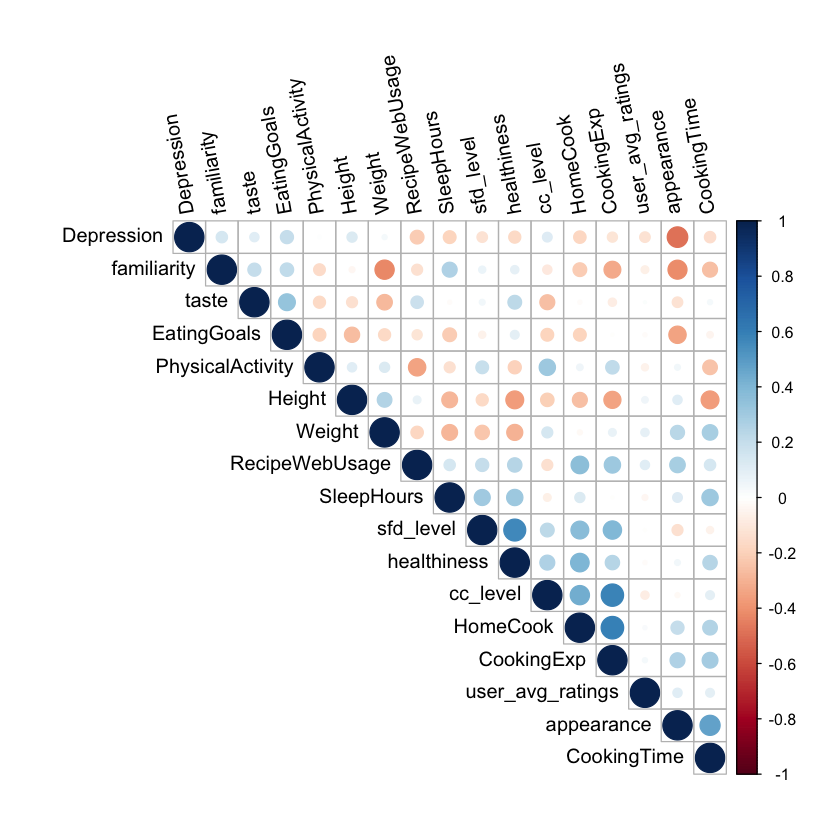

In [201]:
library(corrplot)
corrplot(cor, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 100)

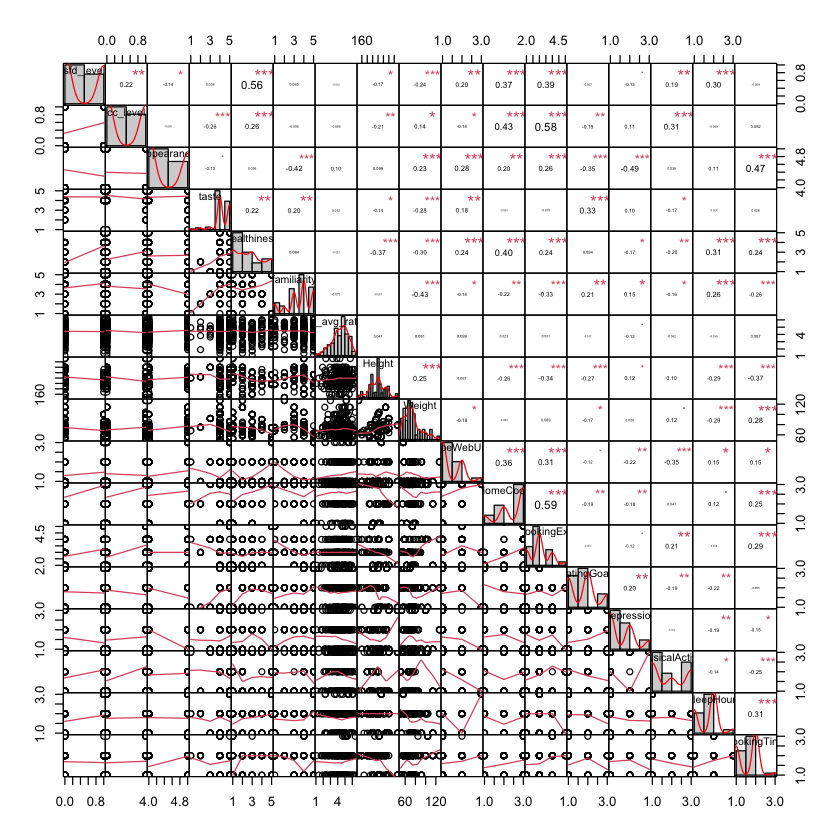

In [202]:
library("PerformanceAnalytics")
chart.Correlation(ratings_profiles, histogram=TRUE, pch=19)
ggsave("./figures/corr.png",  width=10, height=10,dpi=700)

In [205]:
names(all_unique)

[1] "id_x"             "age"              "country"          "education"       
 [5] "gender"           "person"           "FK_9"             "FK_10"           
 [9] "FK_11"            "FK_12"            "CS_9"             "CS_10"           
[13] "CS_11"            "CS_12"            "CS_13"            "CS_14"           
[17] "SFD"              "CC"               "sfd_level"        "cc_level"        
[21] "recipes"          "id_y"             "appearance"       "taste"           
[25] "healthiness"      "familiarity"      "Height"           "Weight"          
[29] "RecipeWebUsage"   "HomeCook"         "CookingExp"       "EatingGoals"     
[33] "Depression"       "PhysicalActivity" "SleepHours"       "CookingTime"     
[37] "user_avg_ratings"

In [206]:
## user choice factors and ratings
# all_unique[,c('SFD','CC','sfd_level','cc_level','rating',
# 'appearance','taste','healthiness','familiarity','user_avg_ratings','Height','Weight',
# 'RecipeWebUsage','HomeCook','CookingExp','EatingGoals','Depression','PhysicalActivity','SleepHours',
# 'CookingTime')]

- User choice factors 

In [207]:
user_choice_factors = all_unique[,c('appearance','taste','healthiness','familiarity','user_avg_ratings')]

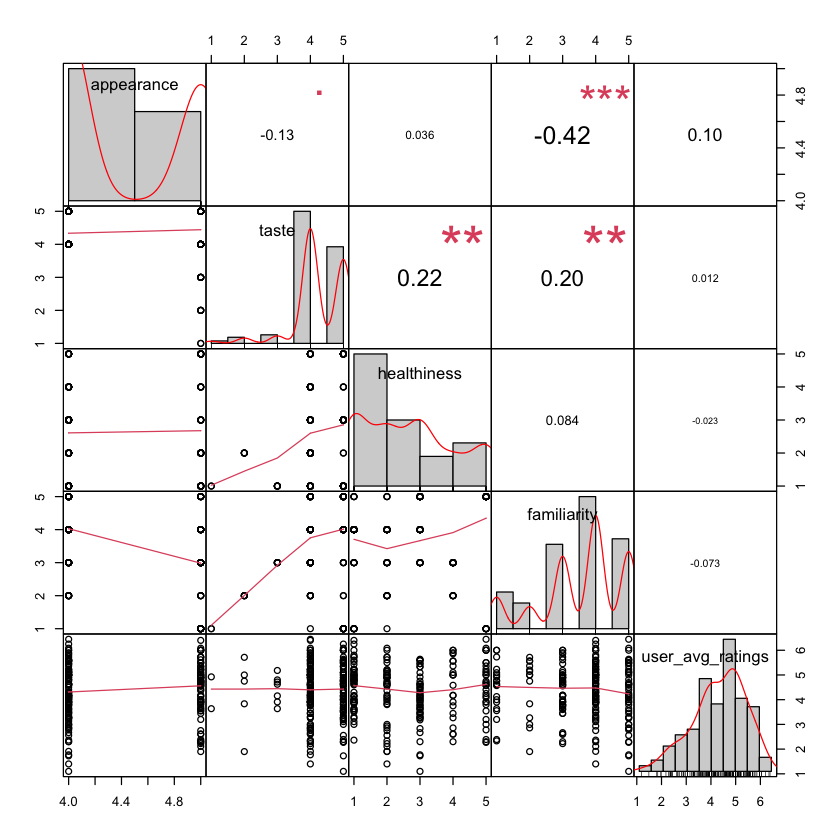

In [208]:
chart.Correlation(user_choice_factors, histogram=TRUE, pch=19)
ggsave("./Figures/user_choice_factors.pdf",  width=8, height=5,dpi=700)

In [209]:
userProfile <- 'user_avg_ratings ~ appearance + taste + healthiness + familiarity'
userP.fit <- lm(userProfile , data = user_choice_factors)
summary <- summary(userP.fit)
summary


Call:
lm(formula = userProfile, data = user_choice_factors)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.13122 -0.64771  0.08608  0.77688  2.31936 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.41501    1.01857   3.353  0.00096 ***
appearance   0.19719    0.17532   1.125  0.26208    
taste        0.05697    0.11029   0.517  0.60606    
healthiness -0.02458    0.05724  -0.429  0.66803    
familiarity -0.03673    0.07169  -0.512  0.60902    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.097 on 196 degrees of freedom
Multiple R-squared:  0.01302,	Adjusted R-squared:  -0.007125 
F-statistic: 0.6463 on 4 and 196 DF,  p-value: 0.6302


## Demographics and ratings 

- age

In [210]:
Rating_age <- user_avg_ratings ~  age
Rating_age.fit <- lm(Rating_age , data = all_unique)
summary <- summary(Rating_age.fit)
summary


Call:
lm(formula = Rating_age, data = all_unique)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2257 -0.6513  0.1229  0.7652  2.1187 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.4847     0.1460  30.719   <2e-16 ***
ageb25_35    -0.1590     0.1935  -0.822   0.4124    
ageb35_45    -0.4199     0.2215  -1.896   0.0595 .  
ageb45_55     0.1425     0.3923   0.363   0.7169    
agebover_55  -0.1338     0.2900  -0.461   0.6451    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.092 on 196 degrees of freedom
Multiple R-squared:  0.02162,	Adjusted R-squared:  0.001652 
F-statistic: 1.083 on 4 and 196 DF,  p-value: 0.3662


- education

In [212]:
Rating_education <- user_avg_ratings ~  education
Rating_education.fit <- lm(Rating_education , data = all_unique)
summary <- summary(Rating_education.fit)
summary


Call:
lm(formula = Rating_education, data = all_unique)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2405 -0.6262  0.2024  0.7595  2.0635 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.34050    0.11389  38.112   <2e-16 ***
educationHigh_school -0.05614    0.17600  -0.319    0.750    
educationMSc          0.04046    0.20589   0.196    0.844    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.098 on 198 degrees of freedom
Multiple R-squared:  0.001072,	Adjusted R-squared:  -0.009018 
F-statistic: 0.1062 on 2 and 198 DF,  p-value: 0.8993


- gender 

In [213]:
unique_gender = read.csv('./unique_gender.csv')

In [214]:
contrast  = c(-1,1)
unique_gender$gender = as.factor(unique_gender$gender)
contrasts(unique_gender$gender) = contrast
print(contrasts(unique_gender$gender))

       [,1]
Female   -1
Male      1


In [215]:
Rating_gender <- user_avg_ratings ~  gender
Rating_gender.fit <- lm(Rating_gender , data = unique_gender)
summary <- summary(Rating_gender.fit)
summary


Call:
lm(formula = Rating_gender, data = unique_gender)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2023 -0.6659  0.1985  0.7699  2.0977 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.33760    0.07911  54.832   <2e-16 ***
gender1     -0.03534    0.07911  -0.447    0.656    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.096 on 199 degrees of freedom
Multiple R-squared:  0.001002,	Adjusted R-squared:  -0.004018 
F-statistic: 0.1996 on 1 and 199 DF,  p-value: 0.6555


- Food knowledge level

In [216]:
SFD <- user_avg_ratings ~  sfd_level
SFD.fit <- lm(SFD , data = all_unique)
summary <- summary(SFD.fit)
summary


Call:
lm(formula = SFD, data = all_unique)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2414 -0.6747  0.2142  0.7586  2.1293 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.3414     0.1027  42.291   <2e-16 ***
sfd_level    -0.0262     0.1560  -0.168    0.867    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.096 on 199 degrees of freedom
Multiple R-squared:  0.0001416,	Adjusted R-squared:  -0.004883 
F-statistic: 0.02819 on 1 and 199 DF,  p-value: 0.8668


- Confirmatory factor analysis

In [217]:
all_unique$FK_12 =  6 - all_unique$FK_12

In [218]:
Food_K = all_unique[, c('FK_9','FK_10','FK_11','FK_12')]
cor_mat_cf = cor(Food_K)
fact_loading_cf = fa(r = cor_mat_cf, nfactors = 4)
fact_loading_cf

Factor Analysis using method =  minres
Call: fa(r = cor_mat_cf, nfactors = 4)
Standardized loadings (pattern matrix) based upon correlation matrix
        MR2   MR1   MR3 MR4   h2    u2 com
FK_9   0.85 -0.03  0.18   0 0.75 0.245 1.1
FK_10  0.08  0.86  0.16   0 0.85 0.152 1.1
FK_11 -0.02  0.84 -0.17   0 0.76 0.236 1.1
FK_12  0.88  0.09 -0.16   0 0.90 0.096 1.1

                       MR2  MR1  MR3  MR4
SS loadings           1.59 1.56 0.12 0.00
Proportion Var        0.40 0.39 0.03 0.00
Cumulative Var        0.40 0.79 0.82 0.82
Proportion Explained  0.49 0.48 0.04 0.00
Cumulative Proportion 0.49 0.96 1.00 1.00

 With factor correlations of 
     MR2   MR1   MR3 MR4
MR2 1.00  0.85  0.14   0
MR1 0.85  1.00 -0.18   0
MR3 0.14 -0.18  1.00   0
MR4 0.00  0.00  0.00   1

Mean item complexity =  1.1
Test of the hypothesis that 4 factors are sufficient.

The degrees of freedom for the null model are  6  and the objective function was  2.89
The degrees of freedom for the model are -4  and the objec

In [243]:
cronbach.alpha(Food_K)


Cronbach's alpha for the 'Food_K' data-set

Items: 4
Sample units: 2122
alpha: -0.577


In [245]:
foodknowledgeModel = ' Level=~ FK_9+FK_10+FK_11+FK_12'

foodknowledge.fit <- cfa(foodknowledgeModel, data = all_unique, std.lv = TRUE, ordered = TRUE)
summary(foodknowledge.fit)

Warning message in lav_samplestats_step2(UNI = FIT, wt = wt, ov.names = ov.names, :
"lavaan WARNING: correlation between variables FK_12 and FK_9 is (nearly) 1.0"
Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
"lavaan WARNING:
    The variance-covariance matrix of the estimated parameters (vcov)
    does not appear to be positive definite! The smallest eigenvalue
    (= -4.738954e-18) is smaller than zero. This may be a symptom that
    the model is not identified."
Warning message in lav_object_post_check(object):
"lavaan WARNING: some estimated ov variances are negative"


lhs,op,rhs,exo,est,se,z,pvalue
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Level,=~,FK_9,0,0.966563389,0.01365796,70.76924930,0.000000e+00
Level,=~,FK_10,0,0.915654326,0.02161986,42.35246349,0.000000e+00
Level,=~,FK_11,0,0.776064840,0.02512757,30.88499236,0.000000e+00
Level,=~,FK_12,0,1.029823650,0.01415197,72.76892322,0.000000e+00
FK_9,|,t1,0,-1.962096557,0.18922144,-10.36931430,0.000000e+00
FK_9,|,t2,0,0.006235434,0.08862332,0.07035884,9.439080e-01
FK_9,|,t3,0,1.129453754,0.11256202,10.03405716,0.000000e+00
FK_10,|,t1,0,-2.577553464,0.34559924,-7.45821511,8.770762e-14
FK_10,|,t2,0,-1.600657784,0.14514635,-11.02788842,0.000000e+00


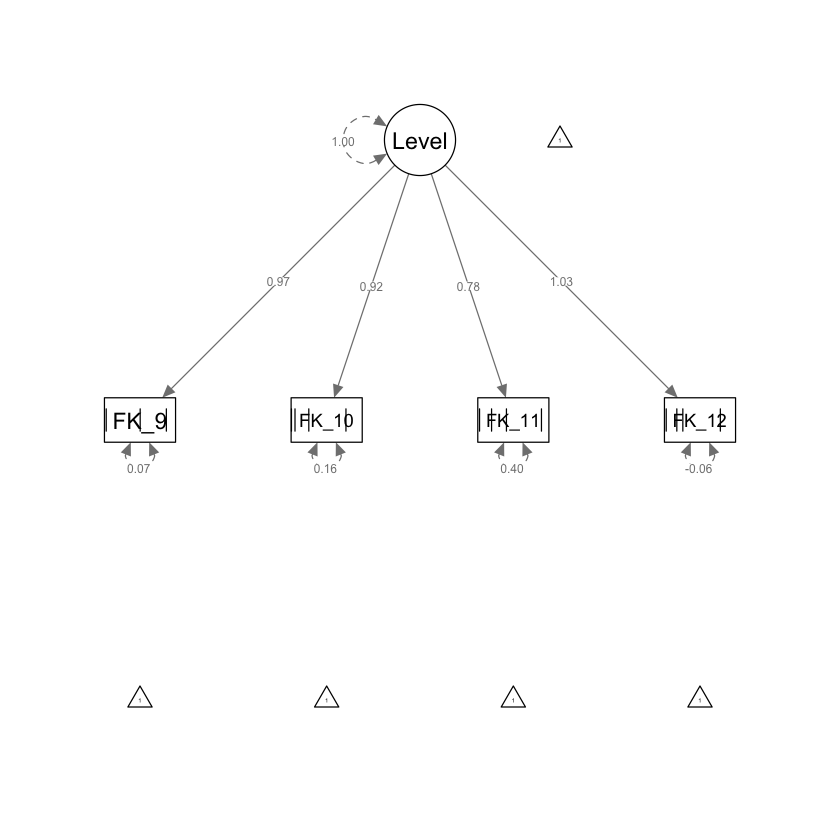

In [223]:
semPaths(foodknowledge.fit, "par", weighted = FALSE, nCharNodes = 7, shapeMan = "rectangle",
         sizeMan = 8, sizeMan2 = 5)

In [242]:
AVE(foodknowledge.fit)

Level 
0.859

In [246]:
all_data$FK_12 =  6 - all_data$FK_12

In [248]:
cronbach.alpha(Food_K)


Cronbach's alpha for the 'Food_K' data-set

Items: 4
Sample units: 2122
alpha: 0.866


In [258]:
Food_K = all_unique[, c('FK_9','FK_10','FK_11','FK_12')]
cor_mat_cf = cor(Food_K)
fact_loading_cf = fa(r = cor_mat_cf, nfactors = 4)
fact_loading_cf

Factor Analysis using method =  minres
Call: fa(r = cor_mat_cf, nfactors = 4)
Standardized loadings (pattern matrix) based upon correlation matrix
        MR2   MR1   MR3 MR4   h2    u2 com
FK_9   0.85 -0.03  0.18   0 0.75 0.245 1.1
FK_10  0.08  0.86  0.16   0 0.85 0.152 1.1
FK_11 -0.02  0.84 -0.17   0 0.76 0.236 1.1
FK_12  0.88  0.09 -0.16   0 0.90 0.096 1.1

                       MR2  MR1  MR3  MR4
SS loadings           1.59 1.56 0.12 0.00
Proportion Var        0.40 0.39 0.03 0.00
Cumulative Var        0.40 0.79 0.82 0.82
Proportion Explained  0.49 0.48 0.04 0.00
Cumulative Proportion 0.49 0.96 1.00 1.00

 With factor correlations of 
     MR2   MR1   MR3 MR4
MR2 1.00  0.85  0.14   0
MR1 0.85  1.00 -0.18   0
MR3 0.14 -0.18  1.00   0
MR4 0.00  0.00  0.00   1

Mean item complexity =  1.1
Test of the hypothesis that 4 factors are sufficient.

The degrees of freedom for the null model are  6  and the objective function was  2.89
The degrees of freedom for the model are -4  and the objec

In [259]:
cor_subtests <- cor(Food_K)

round(cor_subtests, 2)

efa_1 <- factanal(x = Food_K, factors = 1)
class(efa_1)
efa_1

,FK_9,FK_10,FK_11,FK_12
FK_9,1.00,0.68,0.49,0.76
FK_10,0.68,1.00,0.74,0.81
FK_11,0.49,0.74,1.00,0.72
FK_12,0.76,0.81,0.72,1.00


[1] "factanal"


Call:
factanal(x = Food_K, factors = 1)

Uniquenesses:
 FK_9 FK_10 FK_11 FK_12 
0.397 0.217 0.402 0.132 

Loadings:
      Factor1
FK_9  0.777  
FK_10 0.885  
FK_11 0.773  
FK_12 0.932  

               Factor1
SS loadings      2.851
Proportion Var   0.713

Test of the hypothesis that 1 factor is sufficient.
The chi square statistic is 30.19 on 2 degrees of freedom.
The p-value is 2.78e-07 

- Cooking experience

In [225]:
CC <- user_avg_ratings ~  cc_level
CC.fit <- lm(CC , data = all_unique)
summary <- summary(CC.fit)
summary


Call:
lm(formula = CC, data = all_unique)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3132 -0.6275  0.1725  0.7725  2.2170 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.4132     0.1037  42.572   <2e-16 ***
cc_level     -0.1858     0.1549  -1.199    0.232    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.092 on 199 degrees of freedom
Multiple R-squared:  0.007173,	Adjusted R-squared:  0.002184 
F-statistic: 1.438 on 1 and 199 DF,  p-value: 0.2319


In [229]:
AVE(CC_knowledge.fit)

CookingSkills 
        0.537

In [285]:
CC_knowledge <- 'CookingSkills =~ CS_9 + CS_11 + CS_12 + CS_13 + CS_14'
CC_knowledge.fit <- cfa(CC_knowledge, data = all_unique, std.lv = TRUE, ordered = TRUE)
print(summary(CC_knowledge.fit))


Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
"lavaan WARNING:
    The variance-covariance matrix of the estimated parameters (vcov)
    does not appear to be positive definite! The smallest eigenvalue
    (= 5.312591e-18) is close to zero. This may be a symptom that the
    model is not identified."


lavaan 0.6.13 ended normally after 12 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                        23

  Number of observations                           201

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                               100.545      99.210
  Degrees of freedom                                 5           5
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  1.026
  Shift parameter                                            1.214
    simple second-order correction                                

Parameter Estimates:

  Standard errors                           Robust.sem
  Information                                 Expected
  Information saturated (h1) model        Unstructured

Latent Variables:
                   Estimate  

In [295]:
cronbach.alpha(CC)


Cronbach's alpha for the 'CC' data-set

Items: 6
Sample units: 201
alpha: 0.783


In [294]:
AVE(CC_knowledge.fit)

CookingSkills 
        0.591

In [279]:
CC = all_unique[, c('CS_9','CS_10','CS_11','CS_12','CS_13','CS_14')]
cor_mat_cf = cor(CC)
CC_skills = fa(r = cor_mat_cf, nfactors = 4)
CC_skills

Factor Analysis using method =  minres
Call: fa(r = cor_mat_cf, nfactors = 4)
Standardized loadings (pattern matrix) based upon correlation matrix
        MR2   MR1   MR3   MR4   h2   u2 com
CS_9   0.05  0.69  0.15  0.07 0.65 0.35 1.1
CS_10 -0.04  0.72 -0.12 -0.06 0.41 0.59 1.1
CS_11  0.89 -0.06 -0.10  0.13 0.77 0.23 1.1
CS_12  0.86  0.08  0.13 -0.14 0.89 0.11 1.1
CS_13  0.00 -0.08  0.72 -0.09 0.48 0.52 1.1
CS_14  0.13  0.31  0.58  0.15 0.76 0.24 1.8

                       MR2  MR1  MR3  MR4
SS loadings           1.63 1.20 1.05 0.09
Proportion Var        0.27 0.20 0.18 0.01
Cumulative Var        0.27 0.47 0.65 0.66
Proportion Explained  0.41 0.30 0.26 0.02
Cumulative Proportion 0.41 0.71 0.98 1.00

 With factor correlations of 
     MR2  MR1   MR3   MR4
MR2 1.00 0.33  0.46  0.21
MR1 0.33 1.00  0.53  0.14
MR3 0.46 0.53  1.00 -0.10
MR4 0.21 0.14 -0.10  1.00

Mean item complexity =  1.2
Test of the hypothesis that 4 factors are sufficient.

The degrees of freedom for the null model are  

In [280]:
cor_subtests <- cor(CC)

round(cor_subtests, 2)

efa_1 <- factanal(x = CC, factors = 1)
class(efa_1)
efa_1

,CS_9,CS_10,CS_11,CS_12,CS_13,CS_14
CS_9,1.00,0.48,0.24,0.41,0.30,0.62
CS_10,0.48,1.00,0.06,0.18,0.12,0.36
CS_11,0.24,0.06,1.00,0.74,0.15,0.38
CS_12,0.41,0.18,0.74,1.00,0.38,0.59
CS_13,0.30,0.12,0.15,0.38,1.00,0.50
CS_14,0.62,0.36,0.38,0.59,0.50,1.00


[1] "factanal"


Call:
factanal(x = CC, factors = 1)

Uniquenesses:
 CS_9 CS_10 CS_11 CS_12 CS_13 CS_14 
0.547 0.846 0.708 0.455 0.735 0.282 

Loadings:
      Factor1
CS_9  0.673  
CS_10 0.392  
CS_11 0.540  
CS_12 0.738  
CS_13 0.515  
CS_14 0.847  

               Factor1
SS loadings      2.427
Proportion Var   0.405

Test of the hypothesis that 1 factor is sufficient.
The chi square statistic is 147.34 on 9 degrees of freedom.
The p-value is 3.14e-27 

##### USER PROFILE AND RATINGS 

In [174]:
user_profile = all_unique[,c('user_avg_ratings', 'Height','Weight',
'RecipeWebUsage','HomeCook','CookingExp','EatingGoals','Depression','PhysicalActivity','SleepHours',
'CookingTime')]


In [179]:
user_profile$BMI = all_unique$Weight/(all_unique$Height/100) **2

In [194]:
pdf(file = "./Figures/user_profile.pdf",   # The directory you want to save the file in
    width = 4, # The width of the plot in inches
    height = 4) # The height of the plot in inches


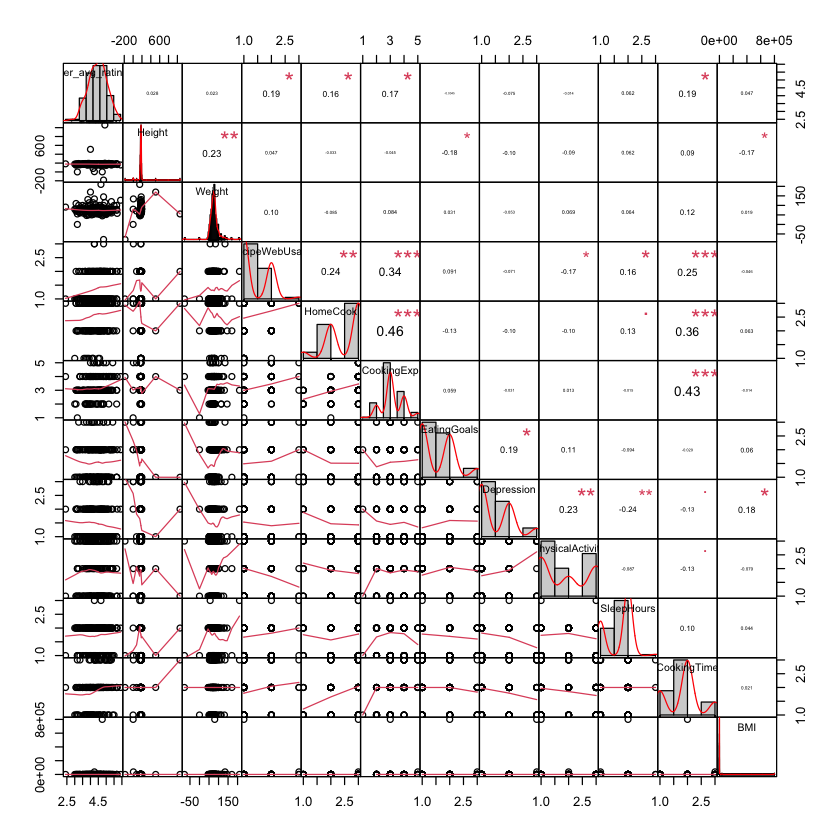

In [195]:
chart.Correlation(user_profile, histogram=TRUE, pch=19)
# ggsave("./Figures/user_profile.pdf",  width=8, height=5,dpi=700)

In [200]:
userProfile <- 'user_avg_ratings ~  RecipeWebUsage+HomeCook+CookingExp+EatingGoals+Depression+PhysicalActivity + SleepHours + CookingTime + BMI'
userP.fit <- lm(userProfile , data = user_profile)
summary <- summary(userP.fit)
summary


Call:
lm(formula = userProfile, data = user_profile)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86416 -0.42053  0.03158  0.39538  1.46425 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       3.710e+00  3.798e-01   9.769   <2e-16 ***
RecipeWebUsage    1.775e-01  1.052e-01   1.687   0.0936 .  
HomeCook          6.579e-02  9.474e-02   0.694   0.4884    
CookingExp        1.494e-02  8.109e-02   0.184   0.8540    
EatingGoals       9.017e-04  8.075e-02   0.011   0.9911    
Depression       -6.001e-02  8.299e-02  -0.723   0.4707    
PhysicalActivity  3.028e-02  5.999e-02   0.505   0.6144    
SleepHours       -5.875e-03  1.073e-01  -0.055   0.9564    
CookingTime       1.149e-01  9.099e-02   1.263   0.2085    
BMI               6.578e-07  8.362e-07   0.787   0.4327    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6436 on 160 degrees of freedom
  (1 observation deleted due to missingne

In [197]:
names(user_profile)

[1] "user_avg_ratings" "Height"           "Weight"           "RecipeWebUsage"  
 [5] "HomeCook"         "CookingExp"       "EatingGoals"      "Depression"      
 [9] "PhysicalActivity" "SleepHours"       "CookingTime"      "BMI"

## Multiple Linear Regression 

- Image features and user Ratings

In [ ]:
userProfile <- 'user_avg_ratings ~  RecipeWebUsage+HomeCook+CookingExp+EatingGoals+Depression+PhysicalActivity + SleepHours + CookingTime + BMI'
userP.fit <- lm(userProfile , data = user_profile)
summary <- summary(userP.fit)
summary

## Plot data

In [220]:
rating_data = read.csv('./csv/rating_dist.csv')
head(rating_data)

,recipes,rating,count
,<chr>,<int>,<int>
1,120 Calorie Peach Pies,4,3
2,120 Calorie Peach Pies,1,1
3,120 Calorie Peach Pies,5,1
4,Acorn Squash Ice Cream,6,3
5,Acorn Squash Ice Cream,4,2
6,Acorn Squash Ice Cream,2,1


## Multi-level linear models 

    -  multi-level or Hierarchical linear modeling, can be categorized into random and fixed effects.
      -  Random effects refer to variable that are not the main focus of a study but may impact the dependent variable.
      - Fixed effect are key predictors of the study.
    - 

In [5]:
model_data = read.csv('./csv/cleaned_data.csv')

In [312]:
model_formula = 'rating ~ .'
model <- lm(model_formula, data = model_data)
model


Call:
lm(formula = model_formula, data = model_data)

Coefficients:
        (Intercept)                  age            education  
         -9.995e+00            1.954e-03            6.107e-01  
             gender                  SFD                   CC  
          5.429e-02           -1.259e-01            7.112e-03  
         appearance                taste          healthiness  
          1.751e-01           -2.122e-02            4.783e-02  
        familiarity       RecipeWebUsage             HomeCook  
          1.423e-01           -1.254e-01           -3.372e-02  
         CookingExp          EatingGoals           Depression  
         -4.374e-02           -1.861e-01            1.572e-02  
   PhysicalActivity           SleepHours          CookingTime  
          2.649e-03           -1.507e-01            3.483e-02  
         brightness            sharpness             contrast  
          3.217e+00           -4.610e+00            2.963e+01  
      colourfulness              en

#### Assumption checks 

Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”
Warning message in sqrt(crit * p * (1 - hh)/hh):
“NaNs produced”


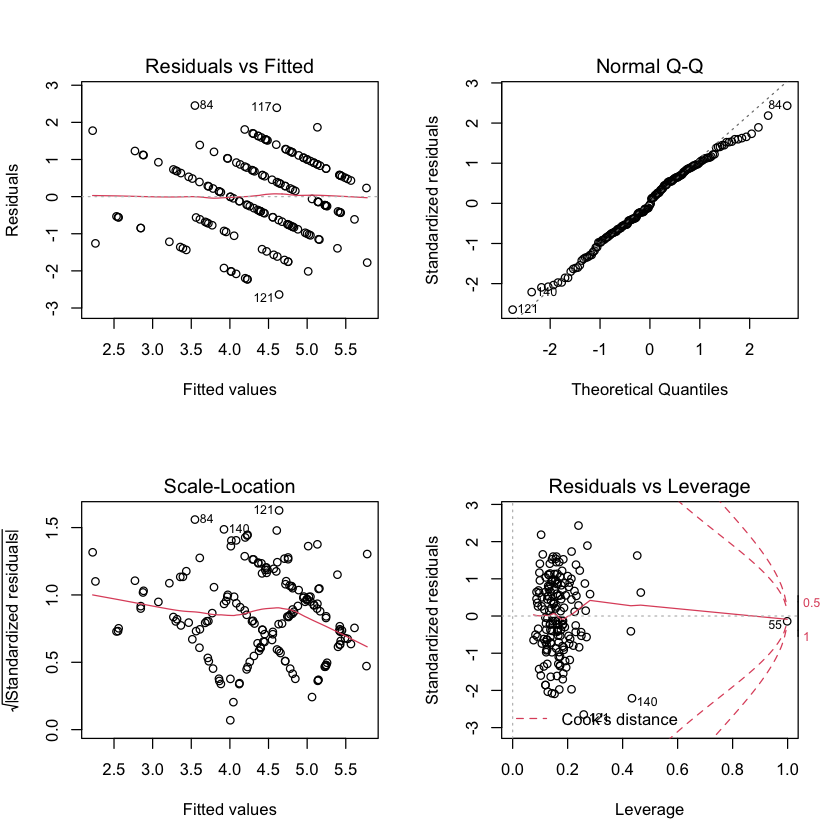

In [313]:
par(mfrow = c(2, 2))
plot(model)

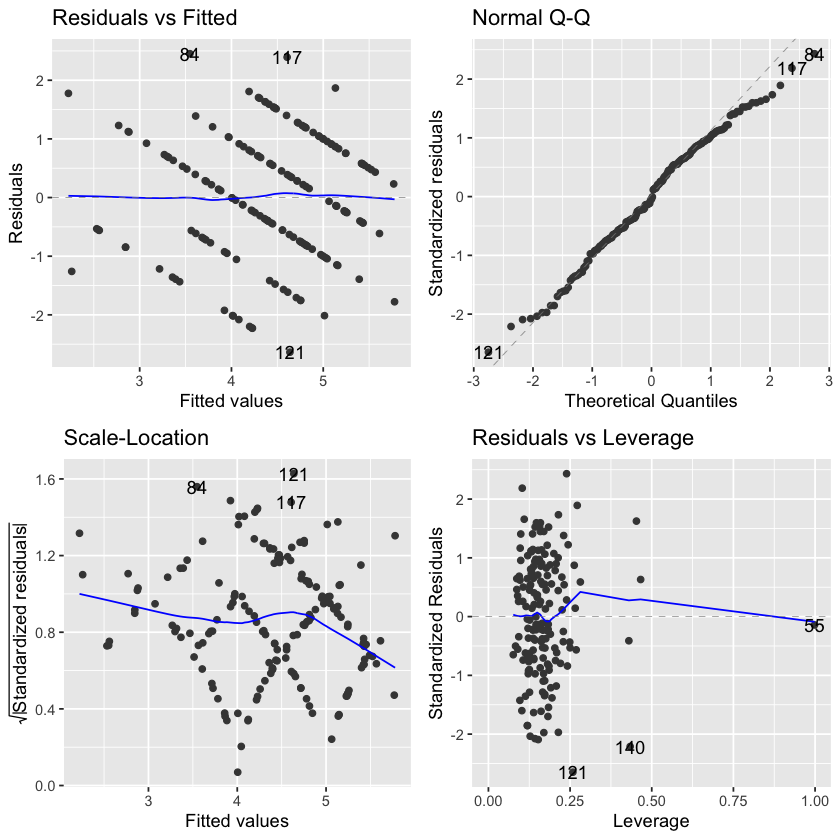

In [314]:
library(ggfortify)
autoplot(model)

- 1 Linearity of the data 

        -  Ideally, The residual plot will show no fitted pattern. That is the red lie should be approximately horizontal at zero. The presence of a pattern may indicate a problem with some aspect of the linear model. As there is no pattern we assume linear relation between variables

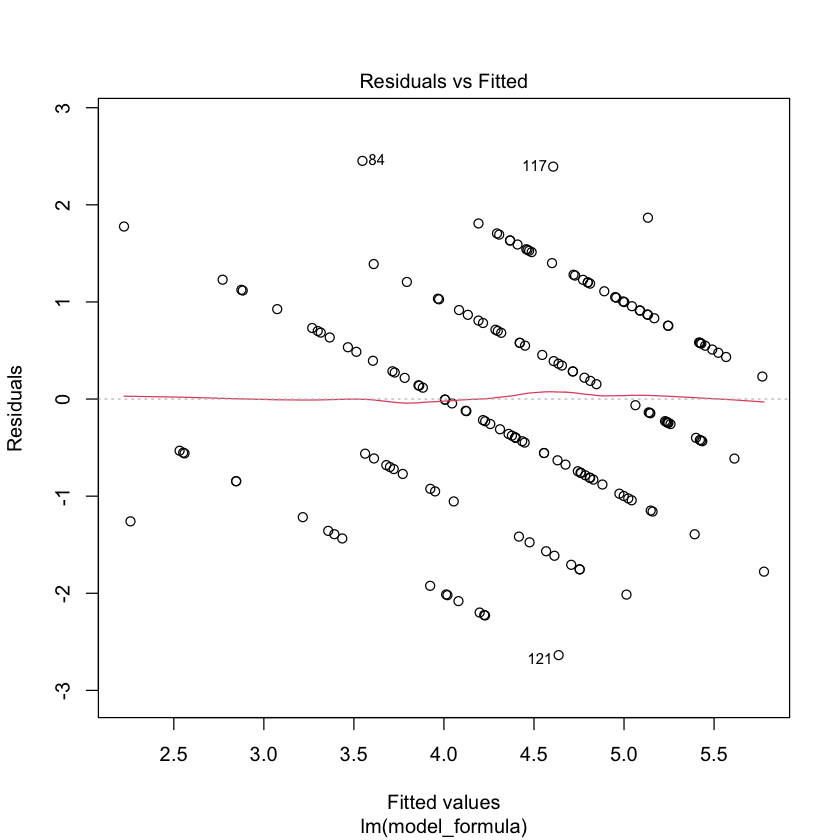

In [315]:
plot(model,1)

- 2 Homogeneity of variance


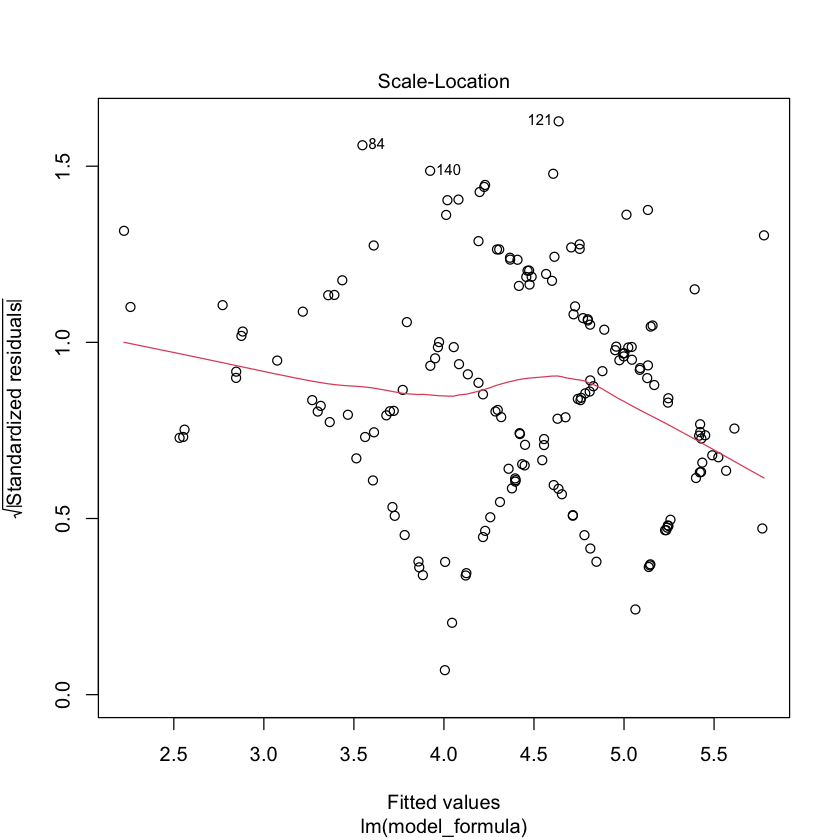

In [316]:
plot(model, 3)

- An intercept only model

In [317]:
model_1 = gls(rating ~1, data= model_data, method = "ML" ,na.action = "na.omit")
summary(model_1)

Generalized least squares fit by maximum likelihood
  Model: rating ~ 1 
  Data: model_data 
       AIC      BIC    logLik
  569.5338 575.7936 -282.7669

Coefficients:
               Value  Std.Error t-value p-value
(Intercept) 4.414201 0.09948549 44.3703       0

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-2.6477363 -0.3212158 -0.3212158  0.4542910  2.0053046 

Residual standard error: 1.289479 
Degrees of freedom: 169 total; 168 residual

In [318]:
formula_2 = 'rating ~.'

# age+education+gender+SFD+CC+rating+appearance+taste+healthiness+familiarity+RecipeWebUsage+HomeCook+CookingExp+EatingGoals+Depression+PhysicalActivity+SleepHours+CookingTime+BMI'

model_2 = lm(formula_2, data=model_data)

In [319]:
summary(model_2)


Call:
lm(formula = formula_2, data = model_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.63689 -0.74342 -0.00654  0.80818  2.45253 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)   
(Intercept)         -9.995e+00  3.704e+00  -2.699  0.00782 **
age                  1.954e-03  2.850e-01   0.007  0.99454   
education            6.107e-01  7.615e-01   0.802  0.42387   
gender               5.429e-02  2.050e-01   0.265  0.79152   
SFD                 -1.259e-01  3.502e-01  -0.360  0.71965   
CC                   7.112e-03  2.199e-01   0.032  0.97425   
appearance           1.751e-01  1.471e-01   1.191  0.23583   
taste               -2.122e-02  1.208e-01  -0.176  0.86082   
healthiness          4.783e-02  9.133e-02   0.524  0.60135   
familiarity          1.423e-01  9.435e-02   1.509  0.13366   
RecipeWebUsage      -1.254e-01  2.059e-01  -0.609  0.54327   
HomeCook            -3.372e-02  1.859e-01  -0.181  0.85631   
CookingExp          -4.37

## LR with Baisc Features

In [1]:
unique_basic = read.csv('./uniqe_basic_features.csv')

In [3]:
basic_f_models <- 'user_avg_ratings ~ .'
userP.fit <- lm(basic_f_models , data = unique_basic)
summary <- summary(userP.fit)
summary


Call:
lm(formula = basic_f_models, data = unique_basic)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.53250 -0.65019 -0.01297  0.59635  2.80866 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -6.3636     2.1607  -2.945 0.003635 ** 
brightness            1.8505     0.9154   2.022 0.044636 *  
sharpness            -0.8285     1.7964  -0.461 0.645198    
contrast              6.6407    19.5571   0.340 0.734573    
colourfulness         6.8036     3.9484   1.723 0.086511 .  
entropy               1.0074     0.2711   3.716 0.000267 ***
rgbContrast          -1.7031     6.6748  -0.255 0.798881    
sharpnessVariation   -0.3259     0.9754  -0.334 0.738649    
saturation           -4.0999     1.9832  -2.067 0.040075 *  
saturationVariation   0.4654     3.6738   0.127 0.899318    
naturalness           1.6494     1.0552   1.563 0.119710    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error:

- with all data 

In [146]:
names(data)

[1] "age"                 "education"           "gender"             
 [4] "FK_9"                "FK_10"               "FK_11"              
 [7] "FK_12"               "CS_9"                "CS_10"              
[10] "CS_11"               "CS_12"               "CS_13"              
[13] "CS_14"               "SFD"                 "CC"                 
[16] "sfd_level"           "cc_level"            "rating"             
[19] "recipes"             "judging"             "appearance"         
[22] "taste"               "healthiness"         "familiarity"        
[25] "Height"              "Weight"              "RecipeWebUsage"     
[28] "HomeCook"            "CookingExp"          "EatingGoals"        
[31] "Depression"          "PhysicalActivity"    "SleepHours"         
[34] "CookingTime"         "user_avg_ratings"    "brightness"         
[37] "sharpness"           "contrast"            "colourfulness"      
[40] "entropy"             "rgbContrast"         "sharpnessVariation" 
[43] "saturation"          "saturationVariation" "naturalness"        
[46] "attractiveness"      "BMI"

In [287]:
data = read.csv('./csv/last_one.csv')

all_f_models <- 'rating  ~ brightness + sharpness + contrast + colourfulness + entropy + rgbContrast + saturation + naturalness'
userP.fit <- lm(all_f_models , data = data)
summary <- summary(userP.fit)
summary


Call:
lm(formula = all_f_models, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3077 -1.3458  0.1588  1.3445  3.9279 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -6.8843     1.2434  -5.537 3.47e-08 ***
brightness      2.1361     0.5153   4.146 3.52e-05 ***
sharpness      -1.1825     0.5172  -2.286 0.022334 *  
contrast        7.4010    11.1114   0.666 0.505440    
colourfulness   6.7254     1.5213   4.421 1.03e-05 ***
entropy         1.0267     0.1543   6.655 3.61e-11 ***
rgbContrast    -1.7820     3.8081  -0.468 0.639877    
saturation     -3.9766     1.0209  -3.895 0.000101 ***
naturalness     1.9153     0.5307   3.609 0.000314 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.758 on 2100 degrees of freedom
Multiple R-squared:  0.1106,	Adjusted R-squared:  0.1073 
F-statistic: 32.66 on 8 and 2100 DF,  p-value: < 2.2e-16


In [149]:
sqrt(mean(userP.fit$residuals^2))

[1] 1.753926

## LR with User features

In [289]:
names(data)

[1] "age"                 "education"           "gender"             
 [4] "FK_9"                "FK_10"               "FK_11"              
 [7] "FK_12"               "CS_9"                "CS_10"              
[10] "CS_11"               "CS_12"               "CS_13"              
[13] "CS_14"               "SFD"                 "CC"                 
[16] "sfd_level"           "cc_level"            "rating"             
[19] "recipes"             "judging"             "appearance"         
[22] "taste"               "healthiness"         "familiarity"        
[25] "Height"              "Weight"              "RecipeWebUsage"     
[28] "HomeCook"            "CookingExp"          "EatingGoals"        
[31] "Depression"          "PhysicalActivity"    "SleepHours"         
[34] "CookingTime"         "user_avg_ratings"    "brightness"         
[37] "sharpness"           "contrast"            "colourfulness"      
[40] "entropy"             "rgbContrast"         "sharpnessVariation" 
[43] "saturation"          "saturationVariation" "naturalness"        
[46] "attractiveness"      "BMI"                 "CS_L"

In [290]:
all_u_models <- 'rating  ~age+education+gender+SFD+CS_L+RecipeWebUsage + HomeCook+CookingExp+EatingGoals+Depression+PhysicalActivity+SleepHours+CookingTime+BMI'
userP.fit <- lm(all_u_models , data = data)
summary <- summary(userP.fit)
summary


Call:
lm(formula = all_u_models, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9139 -1.4237  0.3464  1.5089  3.1520 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       4.000e+00  6.532e-01   6.123 1.09e-09 ***
age              -6.031e-02  1.181e-01  -0.511 0.609555    
education        -3.862e-01  3.255e-01  -1.186 0.235590    
gender           -8.688e-02  9.035e-02  -0.962 0.336343    
SFD              -1.906e-01  1.448e-01  -1.316 0.188410    
CS_L              3.216e-01  8.948e-02   3.595 0.000332 ***
RecipeWebUsage    2.054e-01  9.028e-02   2.275 0.023019 *  
HomeCook         -4.375e-02  8.100e-02  -0.540 0.589175    
CookingExp       -7.106e-02  8.391e-02  -0.847 0.397191    
EatingGoals       1.513e-02  6.591e-02   0.230 0.818451    
Depression       -1.618e-02  7.189e-02  -0.225 0.821917    
PhysicalActivity  2.679e-02  4.946e-02   0.542 0.588093    
SleepHours        3.435e-02  8.981e-02   0.383 0.702123    
Cook

In [151]:
sqrt(mean(userP.fit$residuals^2))

[1] 1.843877

## Removed  user features 

In [291]:
all_u_models <- 'rating  ~age+education+gender+SFD+CS_L+RecipeWebUsage + HomeCook+CookingExp+EatingGoals'
userP.fit <- lm(all_u_models , data = data)
summary <- summary(userP.fit)
summary


Call:
lm(formula = all_u_models, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8174 -1.4054  0.3448  1.5315  3.1596 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.183143   0.560461   7.464 1.23e-13 ***
age            -0.047104   0.116549  -0.404 0.686142    
education      -0.424307   0.320132  -1.325 0.185178    
gender         -0.077690   0.088131  -0.882 0.378136    
SFD            -0.213457   0.138900  -1.537 0.124502    
CS_L            0.315192   0.086971   3.624 0.000297 ***
RecipeWebUsage  0.201457   0.086409   2.331 0.019825 *  
HomeCook       -0.009614   0.078172  -0.123 0.902130    
CookingExp     -0.051442   0.079917  -0.644 0.519840    
EatingGoals     0.019016   0.063654   0.299 0.765165    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.85 on 2099 degrees of freedom
Multiple R-squared:  0.01497,	Adjusted R-squared:  0.01075 
F-statistic: 3.544 on 9 and 2099

In [159]:
sqrt(mean(userP.fit$residuals^2))

[1] 1.845605

## LR with Food Image Dimensions

In [152]:
all_i_d_models <- 'rating  ~appearance+taste+healthiness+familiarity'
userP.fit <- lm(all_i_d_models , data = data)
summary <- summary(userP.fit)
summary


Call:
lm(formula = all_i_d_models, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6163 -1.3746  0.4845  1.6142  3.0464 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.48728    0.36556   9.540   <2e-16 ***
appearance   0.12976    0.06189   2.097   0.0361 *  
taste       -0.00595    0.05061  -0.118   0.9064    
healthiness  0.07771    0.03598   2.160   0.0309 *  
familiarity  0.02310    0.03830   0.603   0.5465    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.858 on 2104 degrees of freedom
Multiple R-squared:  0.004568,	Adjusted R-squared:  0.002675 
F-statistic: 2.414 on 4 and 2104 DF,  p-value: 0.04701


In [231]:
all_i_d_models <- 'user_avg_ratings  ~appearance+taste+healthiness+familiarity'
userP.fit <- lm(all_i_d_models , data = all_unique)
summary <- summary(userP.fit)
summary


Call:
lm(formula = all_i_d_models, data = all_unique)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.13122 -0.64771  0.08608  0.77688  2.31936 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.41501    1.01857   3.353  0.00096 ***
appearance   0.19719    0.17532   1.125  0.26208    
taste        0.05697    0.11029   0.517  0.60606    
healthiness -0.02458    0.05724  -0.429  0.66803    
familiarity -0.03673    0.07169  -0.512  0.60902    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.097 on 196 degrees of freedom
Multiple R-squared:  0.01302,	Adjusted R-squared:  -0.007125 
F-statistic: 0.6463 on 4 and 196 DF,  p-value: 0.6302


In [153]:
sqrt(mean(userP.fit$residuals^2))

[1] 1.855579

## big a model with all

In [154]:
all_i_d_models <- 'rating  ~ age+education+gender+SFD+CC+RecipeWebUsage + HomeCook+CookingExp+EatingGoals+Depression+PhysicalActivity+SleepHours+CookingTime+BMI + brightness + sharpness + contrast + colourfulness + entropy + rgbContrast + saturation + naturalness '
userP.fit <- lm(all_i_d_models , data = data)
summary <- summary(userP.fit)
summary


Call:
lm(formula = all_i_d_models, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3453 -1.3372  0.1694  1.3410  4.3190 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -7.513e+00  1.396e+00  -5.382 8.21e-08 ***
age              -4.789e-02  1.118e-01  -0.428 0.668536    
education        -4.747e-01  3.075e-01  -1.543 0.122865    
gender           -8.173e-02  8.541e-02  -0.957 0.338700    
SFD              -1.489e-01  1.371e-01  -1.086 0.277708    
CC                3.790e-01  9.209e-02   4.116 4.01e-05 ***
RecipeWebUsage    1.700e-01  8.567e-02   1.984 0.047352 *  
HomeCook         -4.894e-02  7.673e-02  -0.638 0.523632    
CookingExp       -7.735e-02  7.893e-02  -0.980 0.327220    
EatingGoals       2.289e-02  6.235e-02   0.367 0.713531    
Depression        1.825e-02  6.812e-02   0.268 0.788826    
PhysicalActivity  4.917e-03  4.676e-02   0.105 0.916260    
SleepHours        9.672e-03  8.490e-02   0.114 0.909306    
Co

## LR with Clip Features

In [23]:
clip_ratings = read.csv('./clip_data.csv')

In [28]:
clip_ratings = subset(clip_ratings, select = -c(recipes) )

ERROR: Error in eval(substitute(select), nl, parent.frame()): object 'recipes' not found


In [235]:
clip_f_models <- 'rating ~ .'
clip.fit <- lm(clip_f_models , data = clip_ratings)
clip_summary <- summary(clip.fit)
clip_summary


Call:
lm(formula = clip_f_models, data = clip_ratings)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6154 -1.0000  0.0714  1.0000  4.1667 

Coefficients: (570 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  35.87980   20.86747   1.719  0.08570 . 
Column2      10.27343   11.93543   0.861  0.38948   
Column3      11.10397   10.20096   1.089  0.27650   
Column4     -11.44197    9.85260  -1.161  0.24566   
Column5       0.57274    4.68332   0.122  0.90268   
Column6       3.00066    2.71349   1.106  0.26894   
Column7      -9.29114   10.70727  -0.868  0.38565   
Column8      -8.28717    7.91234  -1.047  0.29506   
Column9      -7.32343    3.83606  -1.909  0.05640 . 
Column10     -8.75569    7.47380  -1.172  0.24154   
Column11     -5.77403    5.28079  -1.093  0.27435   
Column12     14.02138   13.40496   1.046  0.29570   
Column13     -0.33953    1.77124  -0.192  0.84800   
Column14      4.73580    3.79811   1.247  0.21259 

In [236]:
sqrt(mean(clip.fit$residuals^2))

[1] 1.500356

## LR with VGG16

In [35]:
vgg_16_ratings = read.csv('./vgg16_ratings.csv')
vgg_16_ratings = subset(vgg_16_ratings, select = -c(recipes) )


vgg_16_f_models <- 'rating ~ .'
vgg_16.fit <- lm(vgg_16_f_models , data = vgg_16_ratings)
vgg_16_summary <- summary(vgg_16.fit)
vgg_16_summary


Call:
lm(formula = vgg_16_f_models, data = vgg_16_ratings)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6154 -1.0000  0.0714  1.0000  4.1667 

Coefficients: (3898 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  4.342e+00  1.175e+01   0.370   0.7117  
emb1        -3.928e-01  5.089e+00  -0.077   0.9385  
emb2         6.390e-02  1.622e-01   0.394   0.6937  
emb3        -6.208e-01  1.301e+01  -0.048   0.9619  
emb4        -1.819e-01  6.821e-01  -0.267   0.7898  
emb5         8.849e-01  5.152e-01   1.718   0.0860 .
emb6        -1.655e-01  2.623e+00  -0.063   0.9497  
emb7         1.932e-02  6.764e-01   0.029   0.9772  
emb8        -9.578e-01  7.982e+00  -0.120   0.9045  
emb9         3.056e-02  5.865e-01   0.052   0.9585  
emb10        2.284e-02  1.164e+00   0.020   0.9843  
emb11       -3.477e-01  7.792e+00  -0.045   0.9644  
emb12        5.533e-02  4.327e-02   1.279   0.2011  
emb13        2.100e-01  1.449e+00   0.145   0

In [36]:
sqrt(mean(vgg_16.fit$residuals^2))

[1] 1.500356

## ResNet

In [233]:
resNet_features = read.csv('./ResNet16_ratings.csv')
resNet_features = subset(resNet_features, select = -c(recipes) )


resNet_f_models <- 'rating ~ .'
resNet.fit <- lm(resNet_f_models , data = resNet_features)
resNet_summary <- summary(resNet.fit)
resNet_summary


Call:
lm(formula = resNet_f_models, data = resNet_features)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6401 -1.0000  0.0472  1.0000  4.1667 

Coefficients: (16168 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.556e+00  4.548e-01  12.215  < 2e-16 ***
X1           7.946e+15  5.008e+15   1.587 0.112710    
X2           1.450e+14  1.320e+14   1.099 0.272102    
X3          -2.820e+14  2.575e+14  -1.095 0.273572    
X4           1.196e+15  1.186e+15   1.008 0.313367    
X5          -4.721e+14  4.455e+14  -1.060 0.289436    
X6           2.496e+14  2.646e+14   0.943 0.345647    
X7           1.192e+15  7.956e+14   1.499 0.134156    
X8          -1.504e+13  1.521e+13  -0.989 0.322892    
X9          -6.477e+11  1.201e+13  -0.054 0.956992    
X10          3.815e+12  8.269e+12   0.461 0.644627    
X11         -2.155e+11  1.810e+13  -0.012 0.990502    
X12          1.386e+12  5.067e+12   0.274 0.784475    
X13          3.

In [237]:
sqrt(mean(resNet.fit $residuals^2))

[1] 1.491304

## Food category and rating

In [138]:
df = read.csv('./food_cat_fsa_att.csv')

In [139]:
names(df)

[1] "age"                 "education"           "gender"             
 [4] "FK_9"                "FK_10"               "FK_11"              
 [7] "FK_12"               "CS_9"                "CS_10"              
[10] "CS_11"               "CS_12"               "CS_13"              
[13] "CS_14"               "SFD"                 "CC"                 
[16] "sfd_level"           "cc_level"            "rating"             
[19] "recipes"             "judging"             "appearance"         
[22] "taste"               "healthiness"         "familiarity"        
[25] "Height"              "Weight"              "RecipeWebUsage"     
[28] "HomeCook"            "CookingExp"          "EatingGoals"        
[31] "Depression"          "PhysicalActivity"    "SleepHours"         
[34] "CookingTime"         "user_avg_ratings"    "brightness"         
[37] "sharpness"           "contrast"            "colourfulness"      
[40] "entropy"             "rgbContrast"         "sharpnessVariation" 
[43] "saturation"          "saturationVariation" "naturalness"        
[46] "attractiveness"      "BMI"                 "fsa"                
[49] "category"            "health_fsa"          "category_num"       
[52] "Dessert"             "Pasta"               "Salad"              
[55] "Snack"               "healthy"             "unhealthy"

In [82]:
contrast  = c(1,1,1,-4)
df$category = as.factor(df$category)
# contrasts(df$category) = contrast
# print(contrasts(df$category))

In [83]:
# Reorder levels
df$category <- relevel(df$category, ref = "Dessert")

# Check the new levels
levels(df$category)

[1] "Dessert" "Pasta"   "Salad"   "Snack"

In [86]:
clip_f_models <- 'user_avg_ratings ~ category_num'
clip.fit <- lm(clip_f_models , data = df)
clip_summary <- summary(clip.fit)
clip_summary


Call:
lm(formula = clip_f_models, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3615 -0.6282  0.1059  0.7711  2.5177 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.65931    0.18417  19.869   <2e-16 ***
category_num  0.26740    0.06733   3.972    1e-04 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.054 on 195 degrees of freedom
Multiple R-squared:  0.07484,	Adjusted R-squared:  0.07009 
F-statistic: 15.77 on 1 and 195 DF,  p-value: 0.0001004


In [101]:
# Reorder levels
# df$category <- relevel(df$category, ref = "Salad")

clip_f_models <- 'user_avg_ratings ~ Salad'
clip.fit <- lm(clip_f_models , data = df)
clip_summary <- summary(clip.fit)
clip_summary


Call:
lm(formula = clip_f_models, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3348 -0.6348  0.1486  0.7652  2.4424 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.43478    0.08877  49.957   <2e-16 ***
Salad       -0.43278    0.17800  -2.431   0.0159 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.08 on 195 degrees of freedom
Multiple R-squared:  0.02942,	Adjusted R-squared:  0.02445 
F-statistic: 5.912 on 1 and 195 DF,  p-value: 0.01594


In [102]:
clip_f_models <- 'user_avg_ratings ~ Snack'
clip.fit <- lm(clip_f_models , data = df)
clip_summary <- summary(clip.fit)
clip_summary


Call:
lm(formula = clip_f_models, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.03964 -0.63964  0.02703  0.72195  2.30481 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.13964    0.08599  48.140   <2e-16 ***
Snack        0.75380    0.17242   4.372    2e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.046 on 195 degrees of freedom
Multiple R-squared:  0.08927,	Adjusted R-squared:  0.08459 
F-statistic: 19.11 on 1 and 195 DF,  p-value: 2.003e-05


In [104]:
clip_f_models <- 'user_avg_ratings ~ Dessert'
clip.fit <- lm(clip_f_models , data = df)
clip_summary <- summary(clip.fit)
clip_summary


Call:
lm(formula = clip_f_models, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2677 -0.6078  0.1777  0.7922  2.1922 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.36772    0.09023  48.407   <2e-16 ***
Dessert     -0.15992    0.17910  -0.893    0.373    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.094 on 195 degrees of freedom
Multiple R-squared:  0.004072,	Adjusted R-squared:  -0.001035 
F-statistic: 0.7973 on 1 and 195 DF,  p-value: 0.373


In [106]:
clip_f_models <- 'user_avg_ratings ~ Pasta'
clip.fit <- lm(clip_f_models , data = df)
clip_summary <- summary(clip.fit)
clip_summary


Call:
lm(formula = clip_f_models, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1077 -0.6524  0.1889  0.7242  2.0778 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.36666    0.08993  48.557   <2e-16 ***
Pasta       -0.15893    0.18032  -0.881    0.379    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.094 on 195 degrees of freedom
Multiple R-squared:  0.003968,	Adjusted R-squared:  -0.00114 
F-statistic: 0.7769 on 1 and 195 DF,  p-value: 0.3792


In [112]:
## FSA

In [113]:
df$health_fsa = as.factor(df$health_fsa)

# Reorder levels
df$health_fsa <- relevel(df$health_fsa, ref = "unhealthy")

# Check the new levels
levels(df$health_fsa)

[1] "unhealthy" "healthy"

In [124]:
df_healhy <- data.frame(rating = df$user_avg_ratings,
                     fsa_h = df$health_fsa,
                     healthy_ = healthy,
                     unhealthy_ = unhealthy)

ERROR: Error in data.frame(rating = df$user_avg_ratings, fsa_h = df$health_fsa, : arguments imply differing number of rows: 197, 0


In [142]:
clip_f_models <- 'user_avg_ratings ~ fsa'
clip.fit <- lm(clip_f_models , data = df)
clip_summary <- summary(clip.fit)
clip_summary


Call:
lm(formula = clip_f_models, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0946 -0.6230  0.2020  0.7441  2.2499 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.81392    0.49440   7.714 6.13e-13 ***
fsa          0.07613    0.07243   1.051    0.294    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.093 on 195 degrees of freedom
Multiple R-squared:  0.005635,	Adjusted R-squared:  0.0005353 
F-statistic: 1.105 on 1 and 195 DF,  p-value: 0.2945


In [143]:
sqrt(mean(clip.fit$residuals^2))

[1] 1.087548